In [1]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

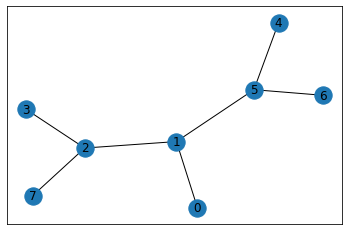

In [5]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [6]:
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [7]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [10]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [11]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [16]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1


def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act


available_act = available_actions(initial_state)


def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action


action = sample_next_action(available_act)


def update(current_state, action, gamma):

    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)


update(initial_state, action, gamma)

max_value 0.0


0

In [22]:
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

max_value 255.99999116576478
Score: 982.7199822675591
max_value 204.79999293261184
Score: 982.7199940181182
max_value 255.99999116576478
Score: 982.7199940181182
max_value 255.99999116576478
Score: 982.7199940181182
max_value 319.9999911657648
Score: 982.71999445983
max_value 255.99999116576478
Score: 982.71999445983
max_value 255.99999116576478
Score: 982.71999445983
max_value 204.79999293261184
Score: 982.71999445983
max_value 399.99998895720597
Score: 982.71999445983
max_value 319.9999911657648
Score: 982.7199949015418
max_value 319.9999911657648
Score: 982.7199949015418
max_value 399.99998895720597
Score: 982.7199949015418
max_value 399.99998895720597
Score: 982.7199949015418
max_value 255.99999293261186
Score: 982.7199952549113
max_value 399.99998895720597
Score: 982.7199952549113
max_value 255.99999293261186
Score: 982.7199952549113
max_value 399.99998895720597
Score: 982.7199952549113
max_value 319.9999911657648
Score: 982.7199956966231
max_value 399.99998895720597
Score: 982.71

max_value 319.99999994785196
Score: 982.7199999173085
max_value 204.79999996662528
Score: 982.7199999173085
max_value 204.79999996662528
Score: 982.7199999173085
max_value 499.9999999912511
Score: 982.719999917746
max_value 399.9999999930009
Score: 982.7199999180959
max_value 255.9999999582816
Score: 982.7199999180959
max_value 255.9999999582816
Score: 982.7199999180959
max_value 499.9999999930009
Score: 982.7199999150068
max_value 255.9999999582816
Score: 982.7199999150068
max_value 319.99999994785196
Score: 982.7199999150068
max_value 255.9999999582816
Score: 982.7199999150068
max_value 399.9999999930009
Score: 982.7199999153568
max_value 255.9999999582816
Score: 982.7199999153568
max_value 255.9999999582816
Score: 982.7199999153568
max_value 319.99999994785196
Score: 982.7199999153568
max_value 399.9999999930009
Score: 982.7199999153568
max_value 319.99999994785196
Score: 982.7199999153568
max_value 399.9999999930009
Score: 982.719999926994
max_value 319.99999999440075
Score: 982.71

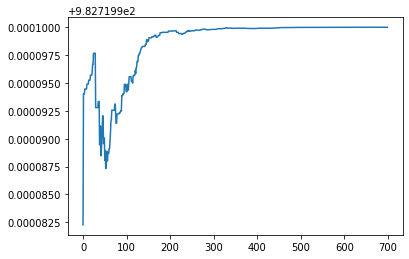

In [23]:
plt.plot(scores)
plt.show()

# Bees

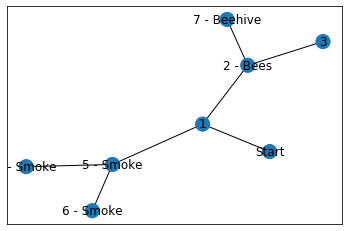

In [24]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3',
    4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'}
H=nx.relabel_nodes(G,mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos,
    node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [25]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)

available_act = available_actions(initial_state)

action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)

  environment = collect_environmental_data(action)
  if 'b' in environment:
    enviro_bees[current_state, action] += 1

  if 's' in environment:
    enviro_smoke[current_state, action] += 1

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)

max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 0.0
max_value 0.0
max_value 144.0
max_value 115.2
max_value 0.0
max_value 144.0
max_value 180.0
max_value 115.2
max_value 0.0
max_value 144.0
max_value 0.0
max_value 115.2
max_value 92.16000000000001
max_value 115.2
max_value 144.0
max_value 92.16000000000001
max_value 115.2
max_value 144.0
max_value 115.2
max_value 92.16000000000001
max_value 115.2
max_value 144.0
max_value 115.2
max_value 115.2
max_value 215.2
max_value 144.0
max_value 92.16000000000001
max_value 144.0
max_value 73.72800000000001
max_value 144.0
max_value 144.0
max_value 272.15999999999997
max_value 272.15999999999997
max_value 115.2
max_value 217.72799999999998
max_value 217.72799999999

max_value 204.76214358668014
max_value 399.94084935418766
max_value 319.95267948335015
max_value 319.95267948335015
max_value 399.94084935418766
max_value 255.96214358668013
max_value 255.96214358668013
max_value 399.94084935418766
max_value 319.95267948335015
max_value 399.94084935418766
max_value 319.95267948335015
max_value 319.95267948335015
max_value 399.94084935418766
max_value 499.95267948335015
max_value 319.95267948335015
max_value 255.96214358668013
Bees Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 35.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 84.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 46.  0.  0.  0.  0.  0.]]
Smoke Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 22.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 85.  0.  0.]
 [ 0.  0.  0.  0. 23.  0. 24.  0.]
 [ 0.  0.  0.  0.  0. 

In [27]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

In [28]:
enviro_matrix

matrix([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  35.,   0.,   0., -22.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,  84.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., -85.,   0.,   0.],
        [  0.,   0.,   0.,   0., -23.,   0., -24.,   0.],
        [  0.,   0.,   0.,   0.,   0., -81.,   0.,   0.],
        [  0.,   0.,  46.,   0.,   0.,   0.,   0.,   0.]])

In [32]:
# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to
# the path selected and the Q learning algorithm
def update(current_state, action, gamma):

    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment:
        enviro_matrix[current_state, action] += 1
    if 's' in environment:
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

max_value 399.99999638149734
max_value 255.99999768415833
Score: 900.7982128683539
max_value 499.9999981473267
Score: 900.7982125680026
max_value 255.99999768415833
Score: 900.7982125680026
going from: [0 2 5]
to: [0 2]
max_value 399.9999985178614
Score: 900.7982129952752
max_value 319.99999881428914
Score: 900.7982133370936
max_value 399.9999985178614
Score: 900.7982137643662
max_value 399.9999985178614
Score: 900.7982137643662
going from: [1 4 6]
to: [1]
max_value 319.99999881428914
Score: 900.7982141061846
max_value 319.99999881428914
Score: 900.7982144480029
max_value 255.99999905143133
Score: 900.7982147214575
max_value 255.99999905143133
Score: 900.7982149949121
max_value 499.9999981473267
Score: 900.7982149949121
max_value 255.99999905143133
Score: 900.7982149949121
max_value 319.99999881428914
Score: 900.7982149949121
max_value 399.9999985178614
Score: 900.7982154221849
max_value 255.99999905143133
Score: 900.7982154221849
max_value 499.9999981473267
Score: 900.7982154221849
ma

Score: 900.7982158768684
max_value 255.9999999666253
Score: 900.7982158768684
going from: [0 2 5]
to: [0 2]
max_value 255.9999999666253
Score: 900.7982158768684
max_value 255.9999999666253
Score: 900.7982158768684
max_value 255.9999999666253
Score: 900.7982158768684
max_value 499.9999999829122
Score: 900.7982158787916
max_value 255.9999999666253
Score: 900.7982158787916
max_value 255.9999999666253
Score: 900.7982158787916
max_value 255.9999999666253
Score: 900.7982158787916
max_value 319.9999999582816
Score: 900.7982158787916
max_value 255.9999999666253
Score: 900.7982158787916
max_value 255.9999999666253
Score: 900.7982158787916
max_value 499.9999999829122
Score: 900.7982158787916
max_value 399.9999999863298
Score: 900.7982158864871
max_value 499.9999999829122
Score: 900.7982158864871
max_value 399.9999999863298
Score: 900.7982158864871
going from: [1 4 6]
to: [1]
max_value 319.9999999582816
Score: 900.7982158864871
max_value 319.9999999582816
Score: 900.7982158864871
going from: [0 2

max_value 399.9999999992486
Score: 900.798215938983
max_value 499.99999999969225
Score: 900.7982159389705
max_value 399.9999999997538
Score: 900.7982159390715
max_value 399.9999999997538
Score: 900.7982159390715
max_value 319.9999999993989
Score: 900.79821593941
max_value 319.9999999993989
Score: 900.79821593941
max_value 499.99999999969225
Score: 900.79821593941
max_value 255.9999999995191
Score: 900.79821593941
going from: [0 2 5]
to: [0 2]
max_value 255.9999999995191
Score: 900.7982159396809
max_value 319.9999999993989
Score: 900.7982159396809
max_value 255.9999999995191
Score: 900.7982159396809
max_value 255.9999999995191
Score: 900.7982159396809


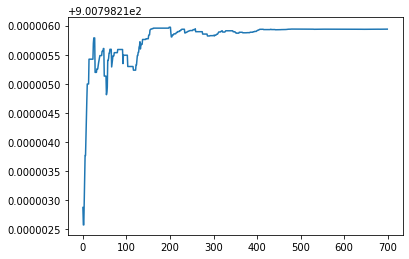

In [33]:
plt.plot(scores)
plt.show()